<a href="https://colab.research.google.com/github/Oldault/-Manage-Landing-Page/blob/master/Paris_Seoul_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output, set_matplotlib_formats
import time
set_matplotlib_formats('retina')

<ipython-input-1-a77c807bf856>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
# Loading in Average temperature Data
df = pd.read_csv('temp.csv');
df.head()

,date,temp-paris,temp-seoul
0,2023-01-01,13.1,-0.2
1,2023-01-02,10.7,-4.5
2,2023-01-03,7.6,-5.0
3,2023-01-04,11.7,-1.8
4,2023-01-05,12.5,-1.6


In [3]:
# General information
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        312 non-null    object 
 1   temp-paris  312 non-null    float64
 2   temp-seoul  312 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.4+ KB


Index(['date', 'temp-paris', 'temp-seoul'], dtype='object')

In [4]:
round(df.describe(), 1)

,temp-paris,temp-seoul
count,312.0,312.0
mean,14.7,16.1
std,6.4,9.8
min,0.8,-14.7
25%,10.0,9.2
50%,14.6,17.6
75%,19.9,24.2
max,27.7,30.9


In [5]:
# Calculating the Max Score for the plot
df['winner'] = df.apply(lambda row: 'Paris' if row['temp-paris'] > row['temp-seoul'] else 'Seoul', axis=1)

winner_count = df['winner'].value_counts()


# La Bagarre commence :)

In [6]:
# Setting scores
score_paris = 0
score_seoul = 0
max_score = max(winner_count)

KeyboardInterrupt: ignored

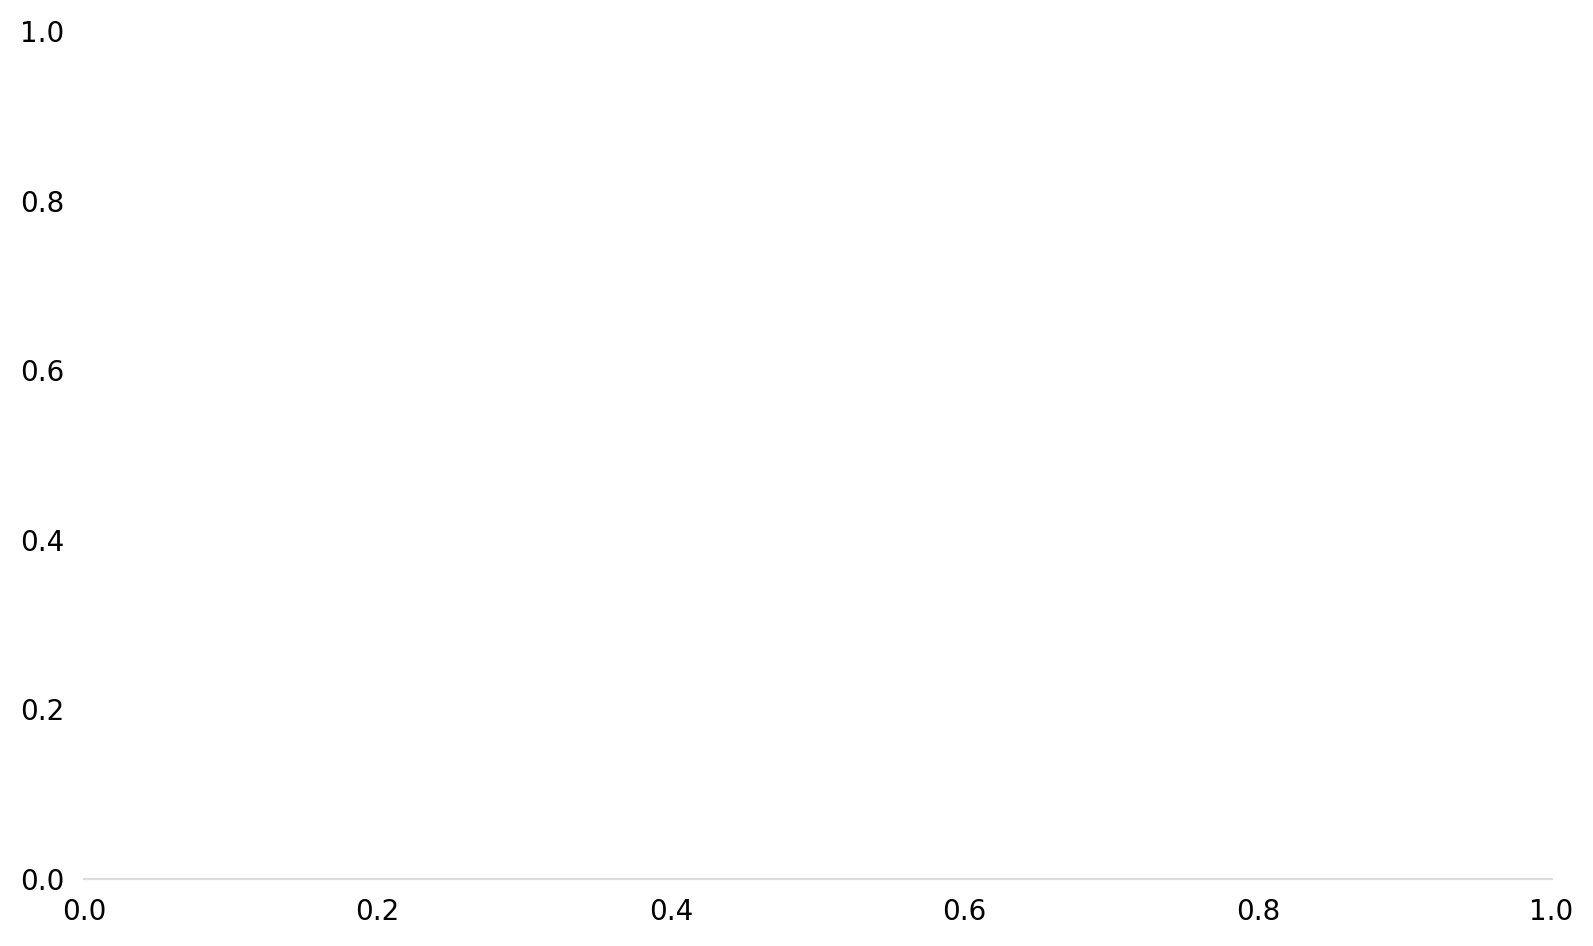

In [9]:
# Initializing the Plot
plt.ion()
plt.rcParams['figure.figsize'] = (8, 5)
fig, ax = plt.subplots()
ax.set_ylim(0, max_score)

# Axis formatting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Initial bar setup
bars = ax.bar(['Paris', 'Seoul'], [0, 0], color=['blue', 'red'])

# Initial text setup
date_text = ax.text(0.5, -0.14, '', transform=ax.transAxes, ha='center', fontsize=20)
score_text = ax.text(0.5, 0.95, '', transform=ax.transAxes, ha='center', fontsize=12, fontweight='bold')

ax.set_title('Temperature Battle: Paris vs Seoul')

fig.tight_layout()

for index, row in df.iterrows():
    temp_paris = row['temp-paris']
    temp_seoul = row['temp-seoul']
    current_date = row['date']

    # Update scores
    if temp_paris > temp_seoul:
        score_paris += 1
    elif temp_seoul > temp_paris:
        score_seoul += 1

    # Update Bar height
    bars[0].set_height(score_paris)
    bars[1].set_height(score_seoul)

    # Update text
    current_date = row['date']
    date_text.set_text(f"Date: {current_date}")
    score_text.set_text(f"Paris: {score_paris} - Seoul: {score_seoul}")

    # Update Plot
    clear_output(wait=True)
    display(fig)
    time.sleep(0.02)

plt.ioff()